## **การวาดแผนที่ว่าง**

- #### ใช้ **map()** เพื่อสร้าง

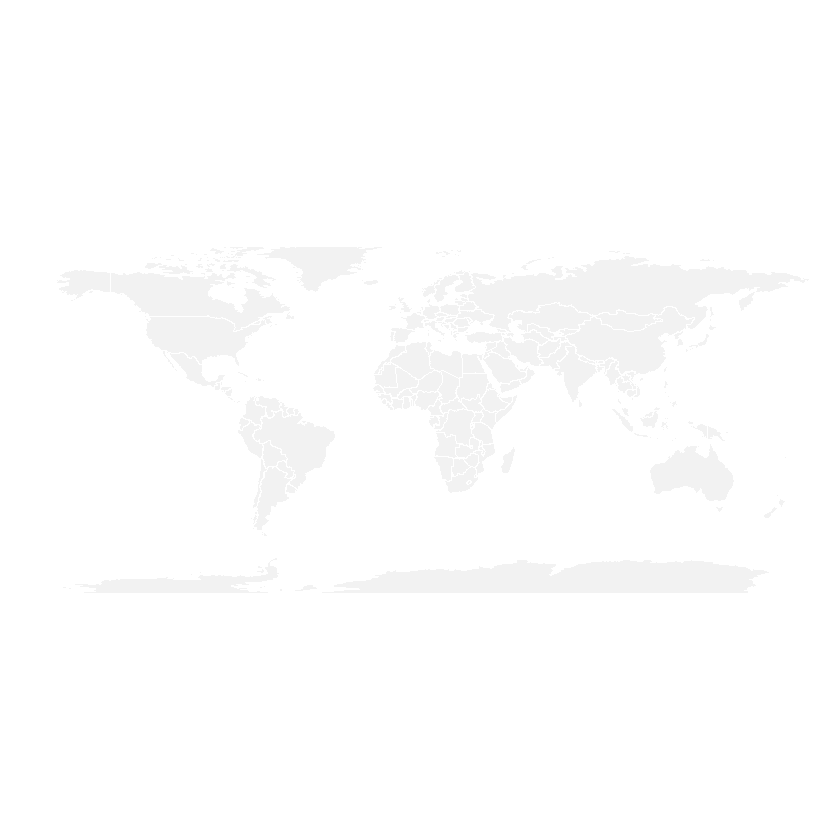

In [2]:
# World map is available in the maps package
library(maps)

# No margin
par(mar=c(0,0,0,0))

# World map
map('world',
    col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,
    mar=rep(0,4),border=0, ylim=c(-80,80) 
)

### **การเพิ่มจุดบนแผนที่**

- #### ใช้ **points()** เพื่อสร้าง

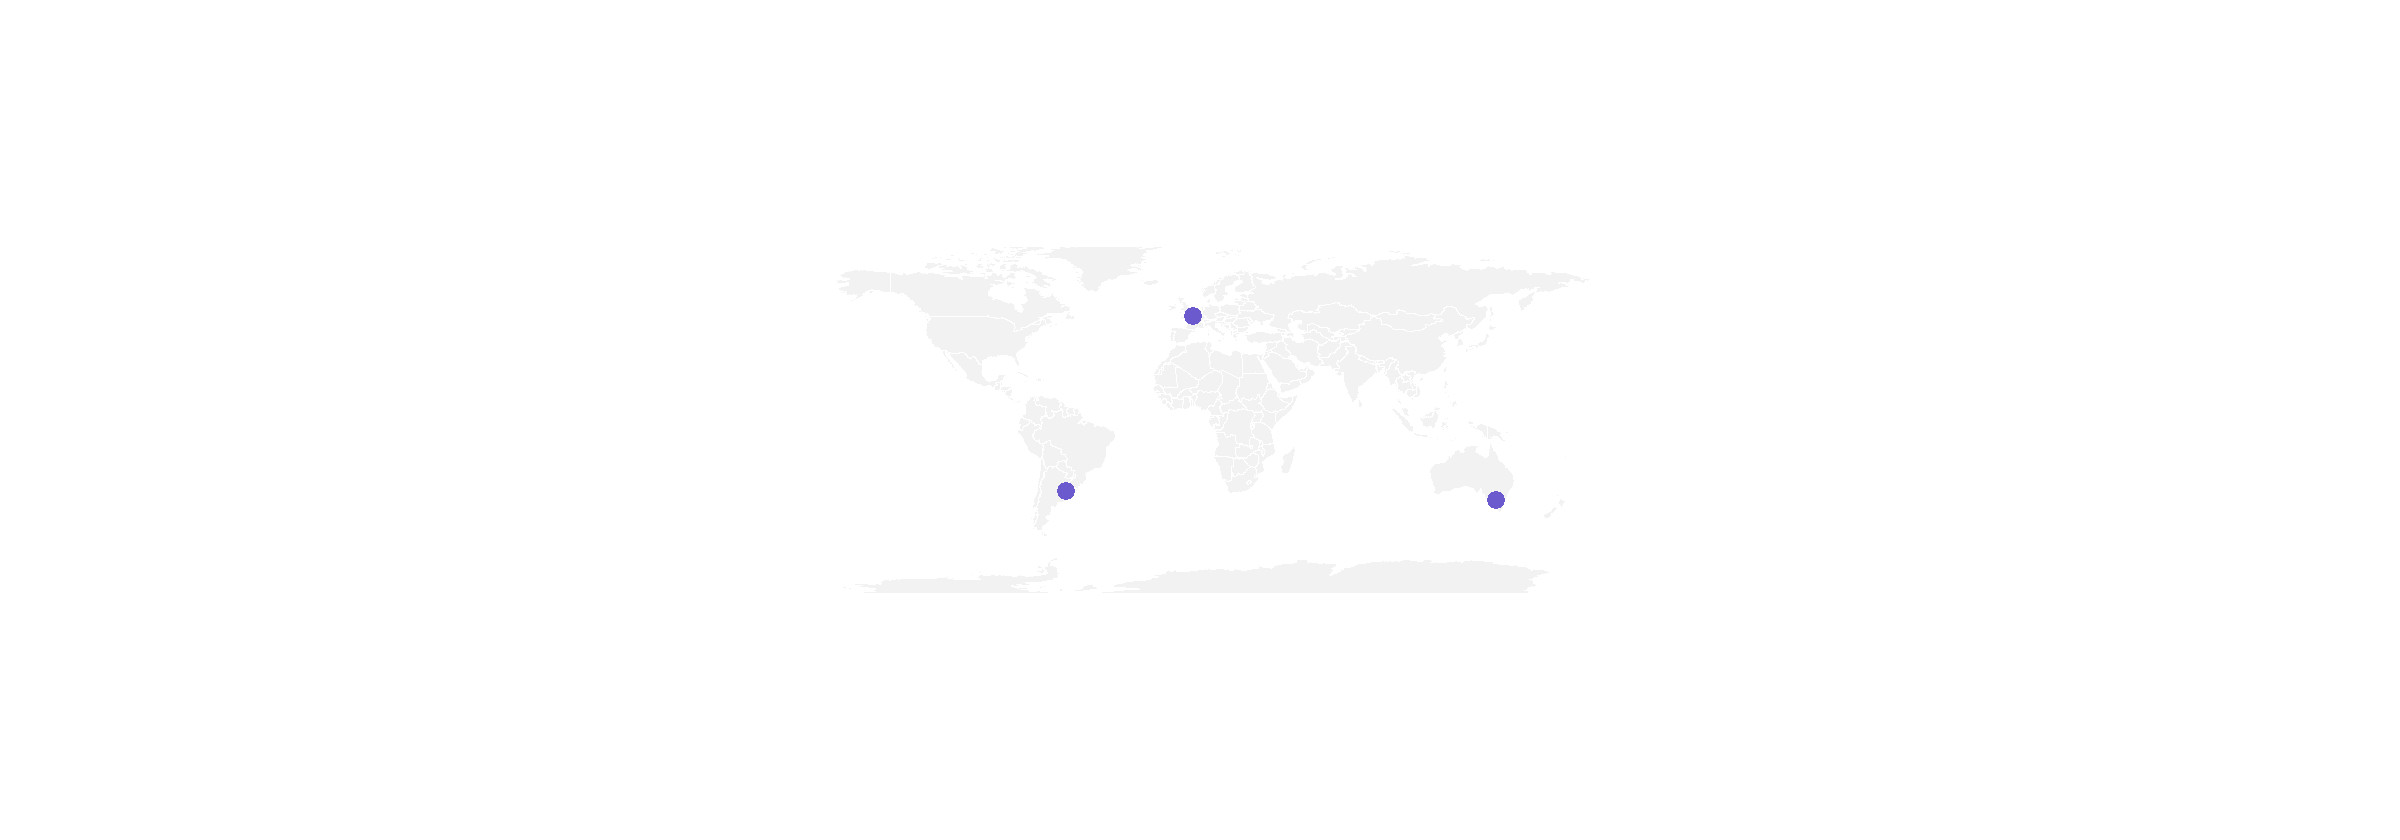

In [7]:
# Dplyr for data wrangling and pipe function
library(dplyr)

# Cities
Buenos_aires <- c(-58,-34)
Paris <- c(2,49)
Melbourne <- c(145,-38)

# Data frame
data <- rbind(Buenos_aires, Paris, Melbourne) %>% 
  as.data.frame()
colnames(data) <- c("long","lat")

# Show the cities on the map
map('world',
    col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,
    mar=rep(0,4),border=0, ylim=c(-80,80) 
)
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)

### **การเชื่อมโยงระหว่างจุด**

- #### โดยใช้ฟังก์ชั่น **gcIntermediate()** และเชื่อมเส้นด้วย **lines()**

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'geosphere' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\Rtmpy8JdNv\downloaded_packages


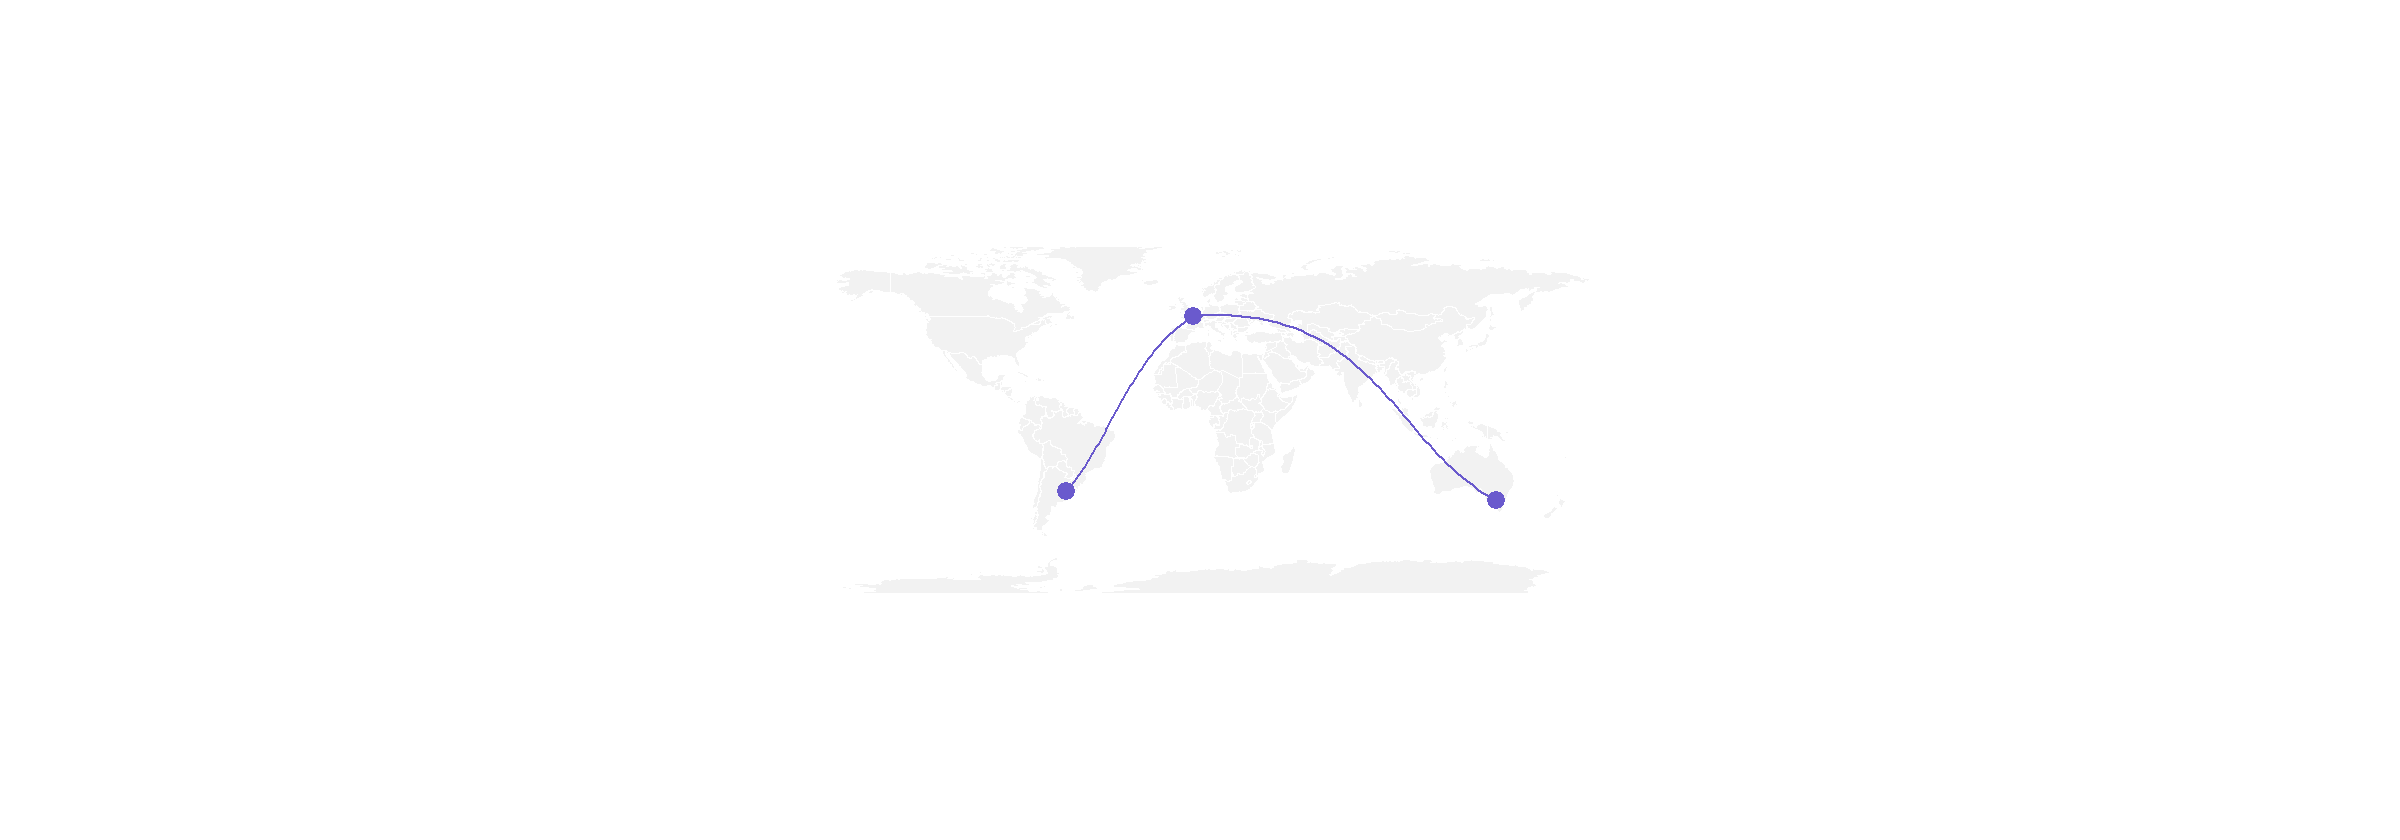

In [9]:
install.packages("geosphere")
# Load geosphere
library(geosphere)

# Background map
map('world',
    col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,
    mar=rep(0,4),border=0, ylim=c(-80,80) 
)

# Dot for cities
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)

# Compute the connection between Buenos Aires and Paris
inter <- gcIntermediate(Paris,  Buenos_aires, n=50, addStartEnd=TRUE, breakAtDateLine=F)

# Show this connection
lines(inter, col="slateblue", lwd=2)
 
# Between Paris and Melbourne
inter <- gcIntermediate(Melbourne,  Paris, n=50, addStartEnd=TRUE, breakAtDateLine=F)             
lines(inter, col="slateblue", lwd=2)

#### ปัญหาที่เกิดขึ้นคือ เส้นจะไปตามเเส้นทางที่สั้นทีี่สุด ดังนั้นควรทำตามขั้นตอนต่อไปนี้

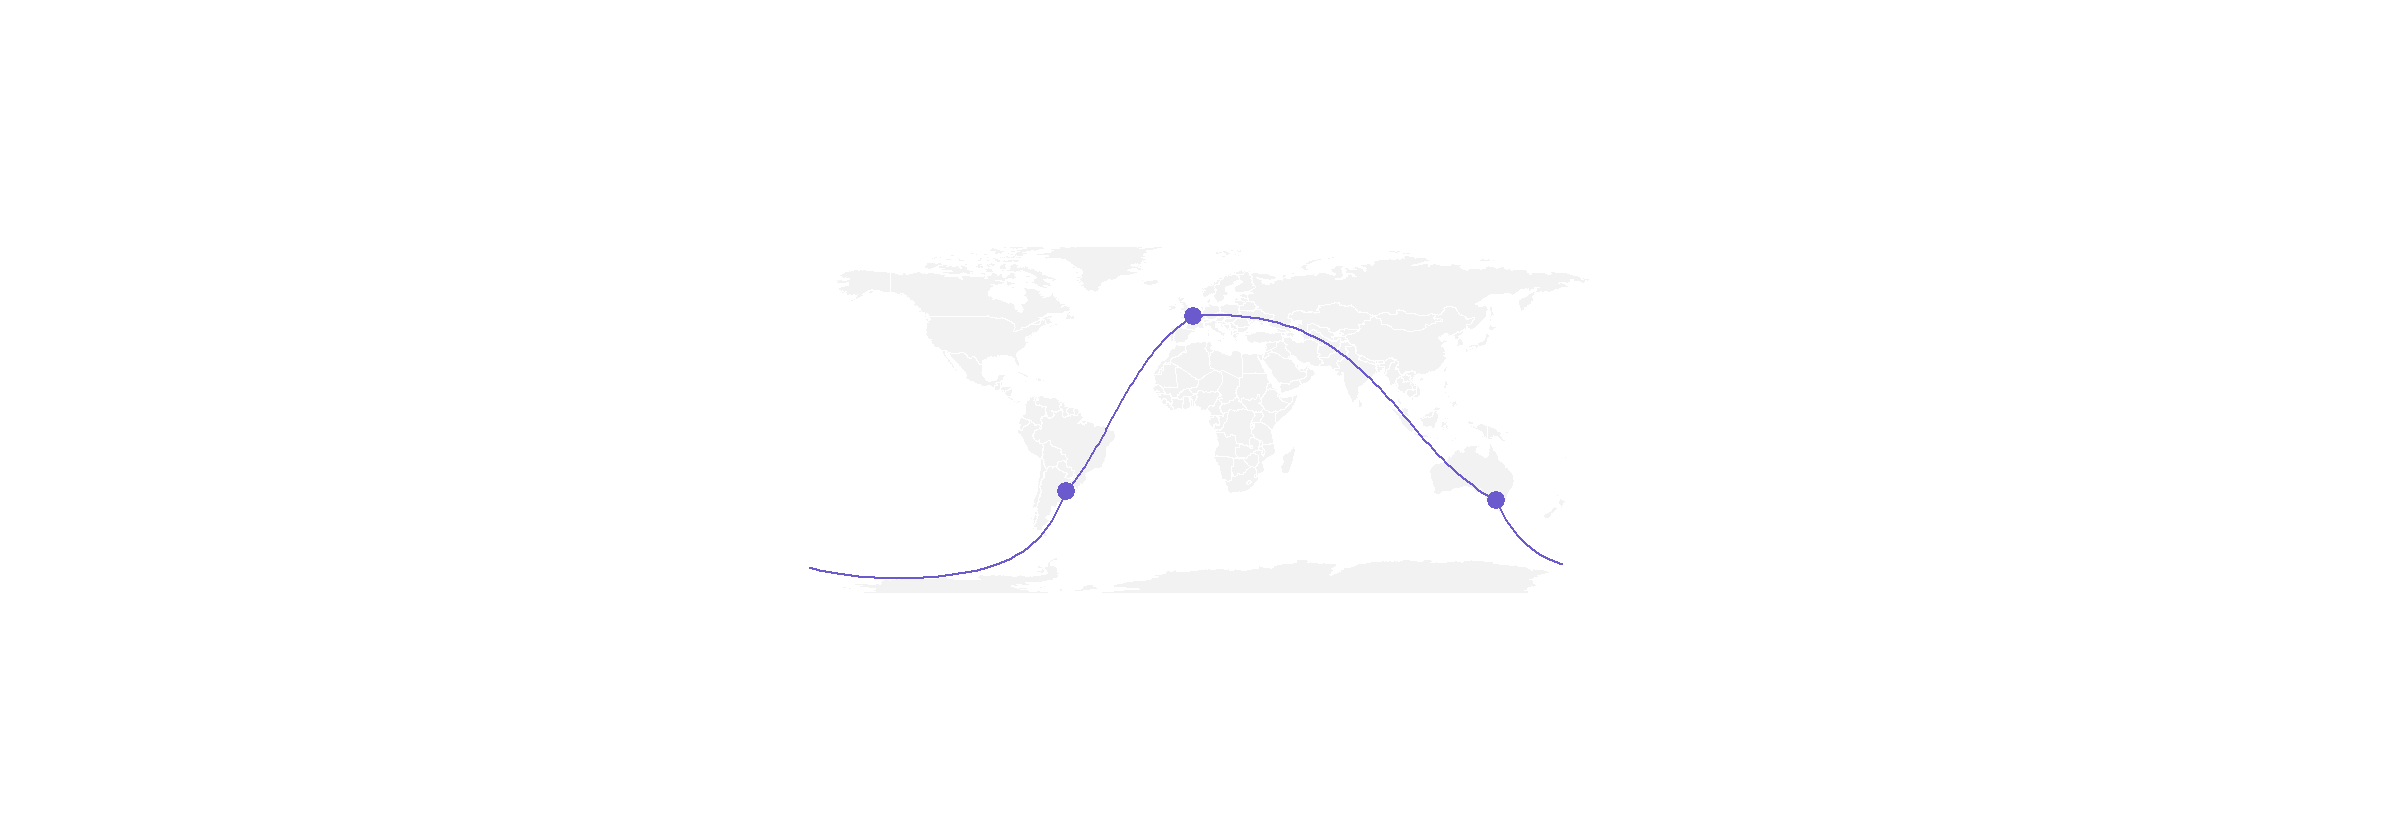

In [13]:
# Background map
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )

# Circles for cities
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)
 
# Connections
plot_my_connection(Paris[1], Paris[2], Melbourne[1], Melbourne[2], col="slateblue", lwd=2)
plot_my_connection(Buenos_aires[1], Buenos_aires[2], Melbourne[1], Melbourne[2], col="slateblue", lwd=2)
plot_my_connection(Buenos_aires[1], Buenos_aires[2], Paris[1], Paris[2], col="slateblue", lwd=2)

### **การปรับใช้การจับคู่กับหลายๆคู่**

- #### ใช้ **for** เพื่อ loop การจับคู่

- #### ใช้ **text** เพื่อใส่ชื่อเมือง

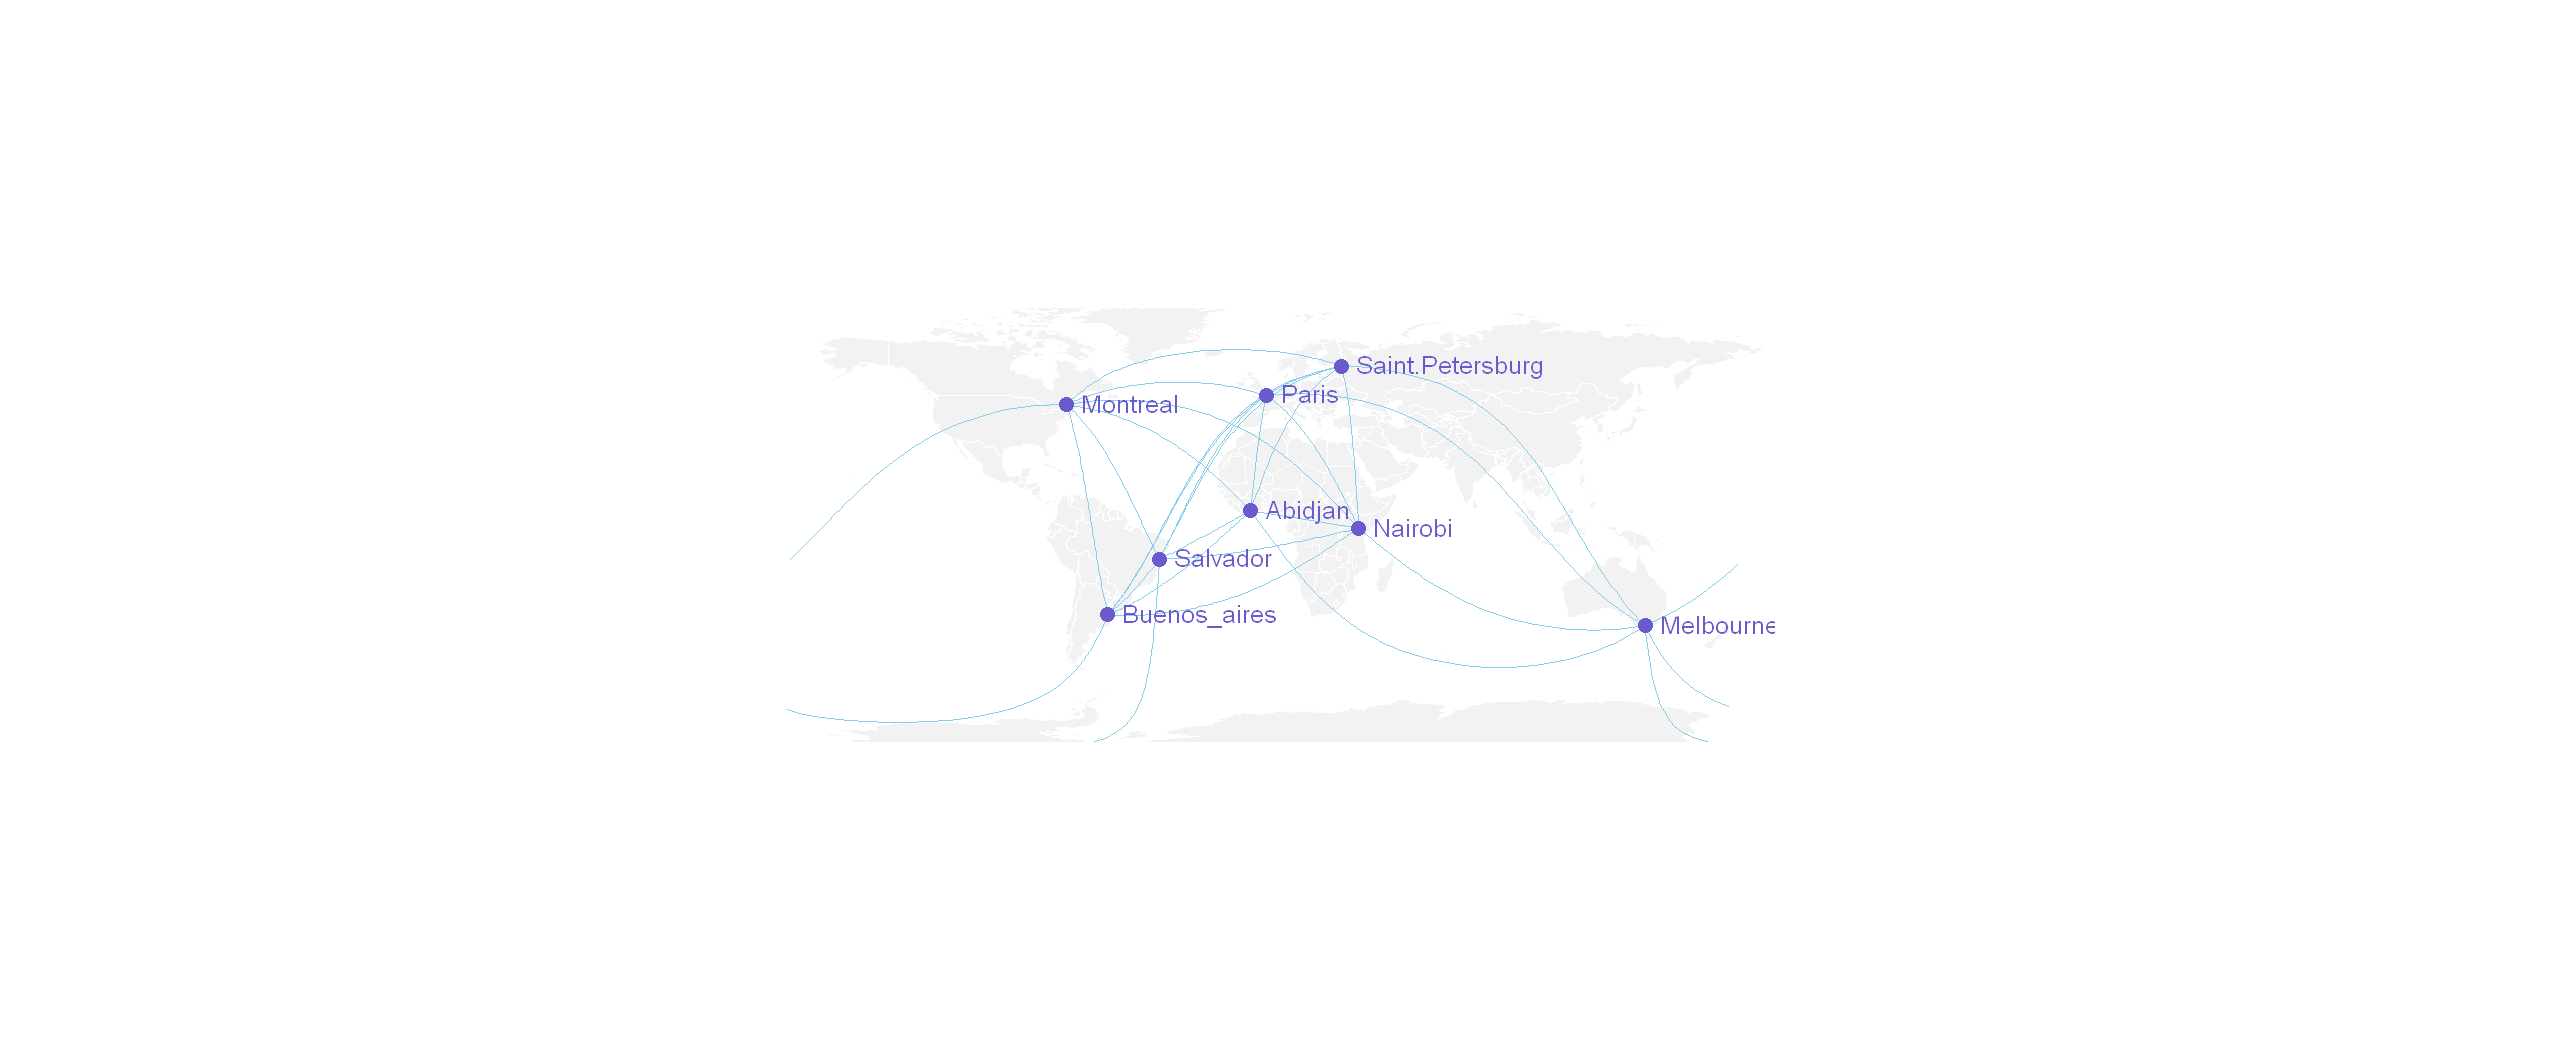

In [39]:
# Create dataset
data <- rbind(
    Buenos_aires=c(-58,-34),
    Paris=c(2,49),
    Melbourne=c(145,-38),
    Saint.Petersburg=c(30.32, 59.93),
    Abidjan=c(-4.03, 5.33),
    Montreal=c(-73.57, 45.52),
    Nairobi=c(36.82, -1.29),
    Salvador=c(-38.5, -12.97)
    )  %>% as.data.frame()
colnames(data)=c("long","lat")

# Generate all pairs of coordinates
all_pairs <- cbind(t(combn(data$long, 2)), t(combn(data$lat, 2))) %>% as.data.frame()
colnames(all_pairs) <- c("long1","long2","lat1","lat2")

# background map
par(mar=c(0,0,0,0))
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )
 
# add every connections:
for(i in 1:nrow(all_pairs)){
    plot_my_connection(all_pairs$long1[i], all_pairs$lat1[i], all_pairs$long2[i], all_pairs$lat2[i], col="skyblue", lwd=1)
    }
 
# add points and names of cities
points(x=data$long, y=data$lat, col="slateblue", cex=2, pch=20)
text(rownames(data), x=data$long, y=data$lat,  col="slateblue", cex=1, pos=4)
 options(repr.plot.width  = 17, repr.plot.height = 7, repr.plot.res = 150)

## **การใช้ Greatcirclefunction**

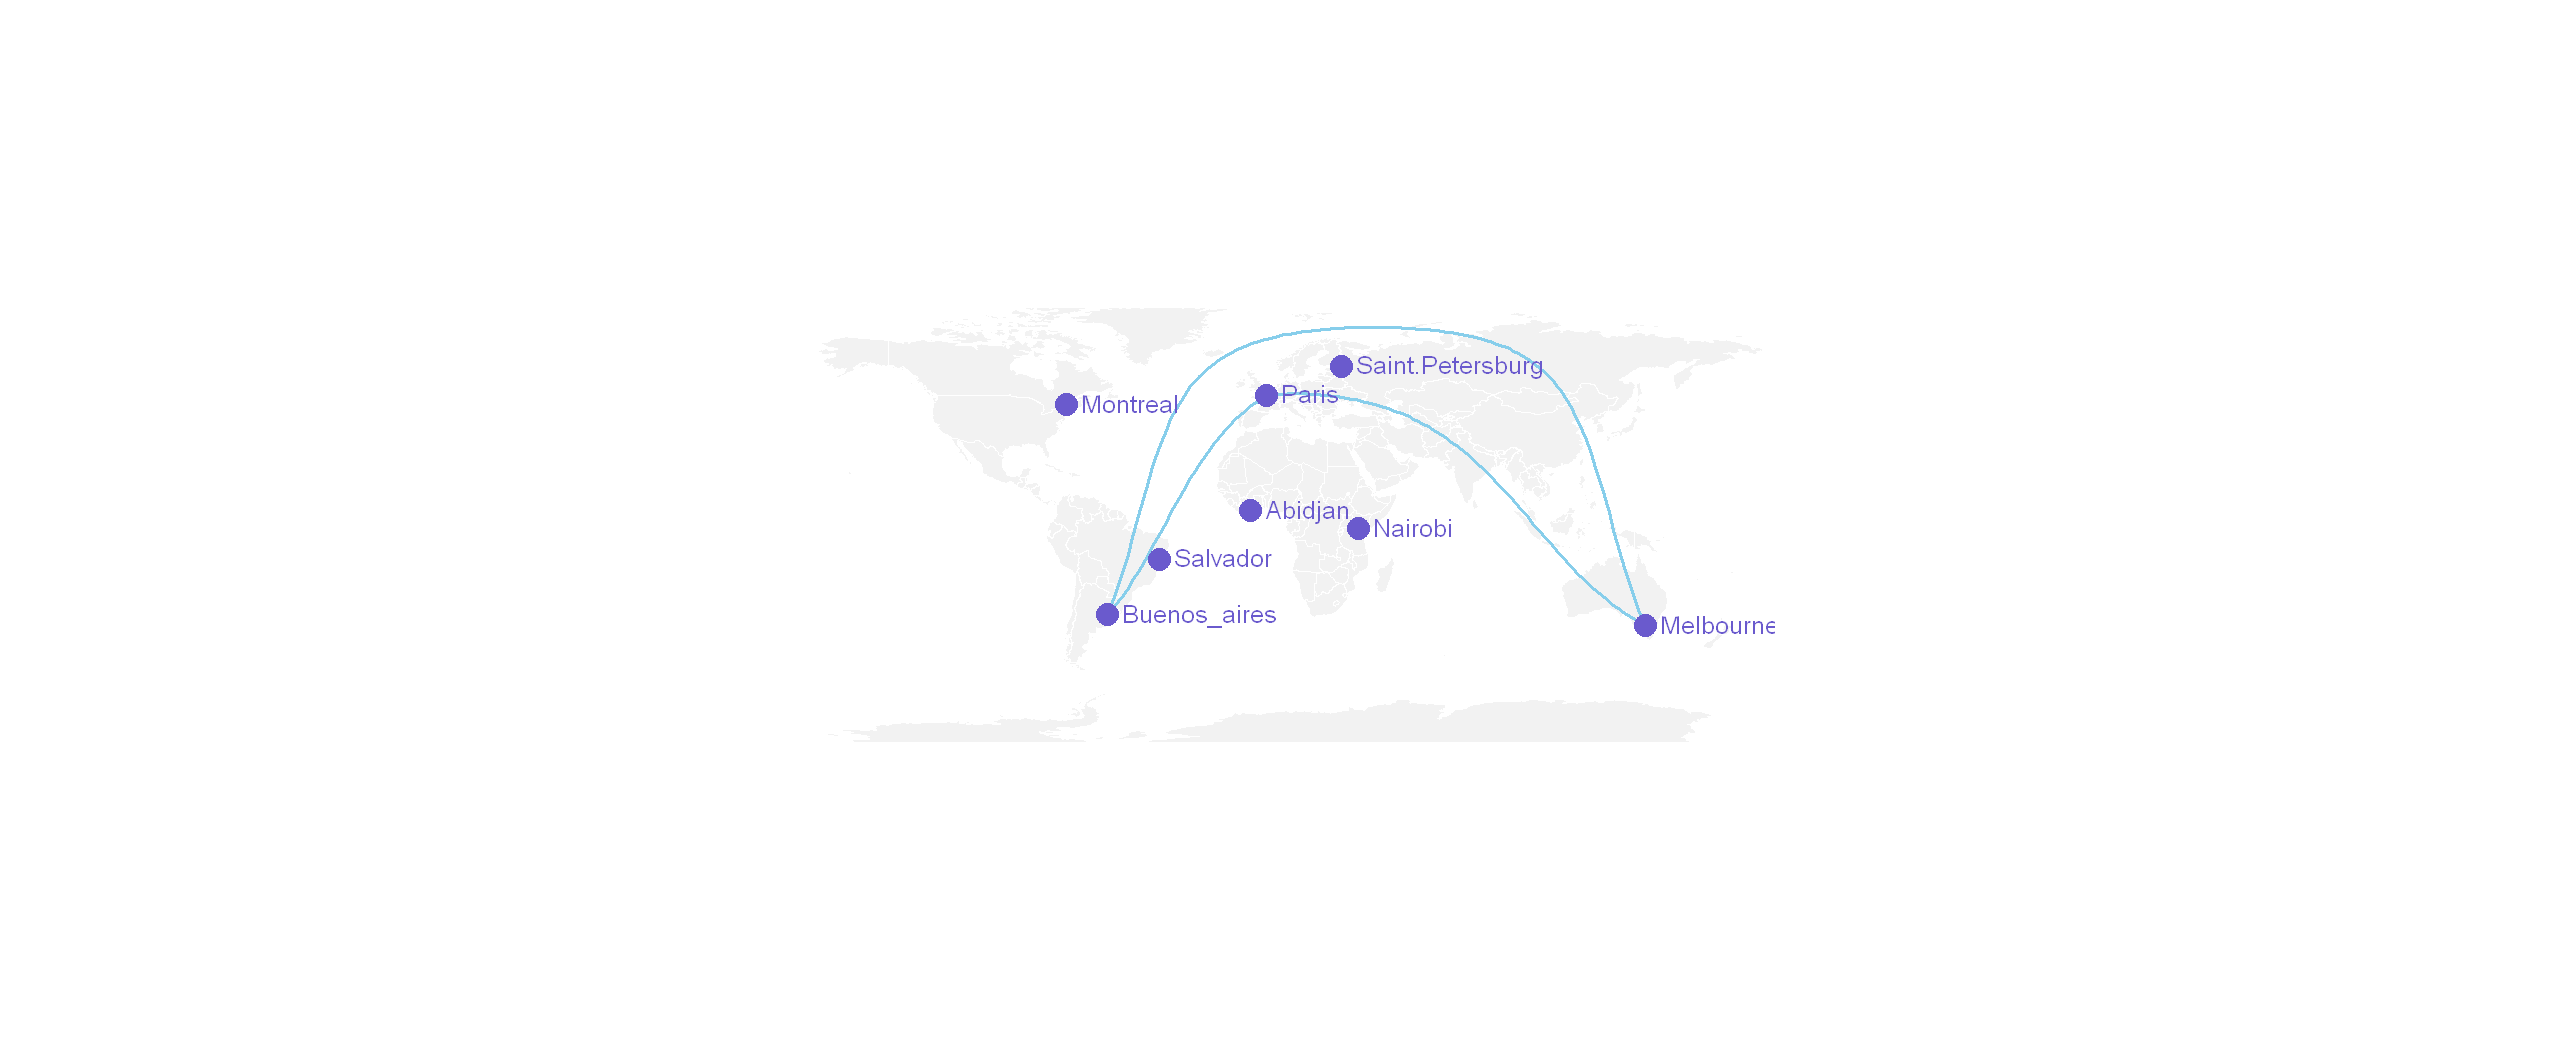

In [40]:
# A function that keeps the good part of the great circle, by Jeff Leek:
getGreatCircle <- function(userLL,relationLL){
  tmpCircle = greatCircle(userLL,relationLL, n=200)
  start = which.min(abs(tmpCircle[,1] - data.frame(userLL)[1,1]))
  end = which.min(abs(tmpCircle[,1] - relationLL[1]))
  greatC = tmpCircle[start:end,]
  return(greatC)
}
 
# background map
map('world',col="#f2f2f2", fill=TRUE, bg="white", lwd=0.05,mar=rep(0,4),border=0, ylim=c(-80,80) )

# map 3 connections:
great <- getGreatCircle(Paris, Melbourne)
lines(great, col="skyblue", lwd=2)
great <- getGreatCircle(Buenos_aires, Melbourne)
lines(great, col="skyblue", lwd=2)
great <- getGreatCircle(Paris, Buenos_aires)
lines(great, col="skyblue", lwd=2)

# City names and dots
points(x=data$long, y=data$lat, col="slateblue", cex=3, pch=20)
text(rownames(data), x=data$long, y=data$lat,  col="slateblue", cex=1, pos=4)